# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# import Data

In [2]:
data = pd.read_csv('default of credit card clients.csv')


- LIMIT_BAL: Amount of the given credit (NT dollar): it includes
both the individual consumer credit and his/her family
(supplementary) credit.

- SEX: Gender (1 = male; 2 = female).

- EDUCATION: Education (1 = graduate school; 2 = university;
3 = high school; 4 = others).

- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

- AGE: Age (year).

- PAY_1 -->> PAY_6 : History of past payment. We tracked the past
monthly payment records (from April to September,
2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,
2005;...;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
1 = pay duly; 1 = payment delay for one month;
2 = payment delay for two months; ...; 8 = payment
delay for eight months; 9 = payment delay for nine
months and above.

- BILL_AMT1 -->> BILL_AMT6 : Amount of bill statement (NT dollar).

X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August,
2005;...;X17 = amount of bill statement in April, 2005.
 X18–X23: Amount of previous payment (NT dollar).
X18 = amount paid in September, 2005; X19 = amount
paid in August, 2005;...;X23 = amount paid in April,
2005.


# Explorate Dataset

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Target Data = dpnm

In [5]:
target = data['dpnm']

In [6]:
target

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: dpnm, Length: 30000, dtype: int64

In [7]:
data['dpnm'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dpnm, dtype: float64

# Show Unique Values in Data

In [8]:
data.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
dpnm             2
dtype: int64

# Dataset Shape

In [9]:
rows_count, columns_count = data.shape
print("Number of rows :", rows_count)
print("Number of columns :", columns_count)

Number of rows : 30000
Number of columns : 25


# Null Values

In [10]:
data.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

# Check Duplicates

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

# Heat map Correlation of Attributes

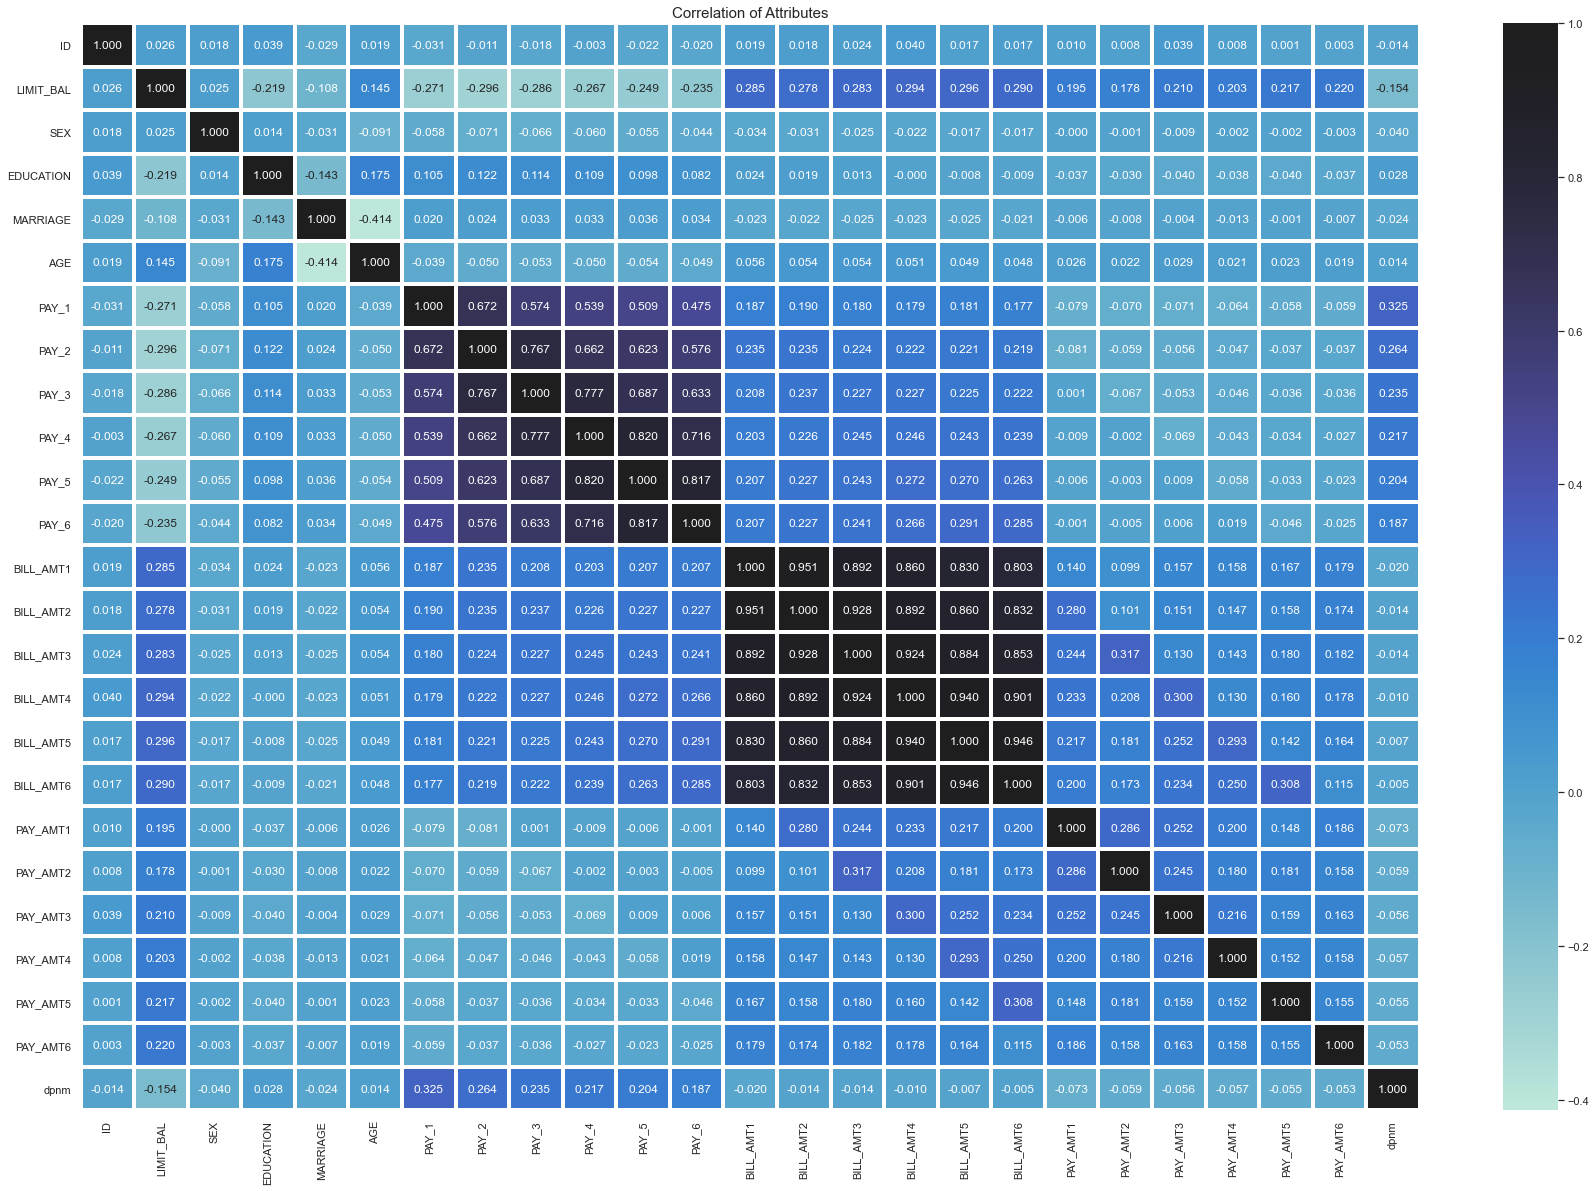

In [13]:
plt.figure(figsize=(30,20))
plt.title('Correlation of Attributes', size=15)
sns.heatmap(data.corr(), annot=True, linewidths=3, fmt='.3f', center=1);

# The biggest effect

In [14]:
threshold = 0.5

In [15]:
#to remove if the correlation greater than 0.8
def correlation (dataset ,  threshold):
    col_corr         = set()
    corr_matrix      = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold:
                colname  = corr_matrix.columns[i]
                col_corr.add(colname)
            
    return col_corr


In [16]:
correlation(data.iloc[:,:-1],threshold)

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'}

**Observation:** found that the most correlated features on dpnm is: 

- PAY_1  -->>  PAY_6
- BILL_AMT1  -->>  BILL_AMT6

# **Data Visualization**

In [17]:
PAY = data['PAY_1'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6'] 
PAY

0       -2
1        3
2        0
3        0
4       -2
        ..
29995    0
29996   -4
29997    8
29998   -1
29999    0
Length: 30000, dtype: int64

Text(0.5, 1.0, 'PAY1 --> PAY6')

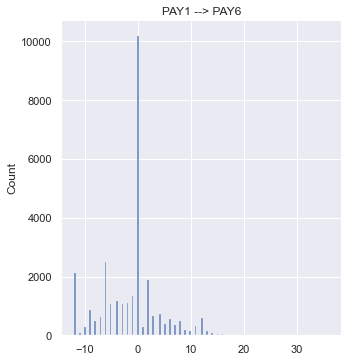

In [18]:
sns.displot(PAY)
plt.title('PAY1 --> PAY6')

In [19]:
BILL_AMT = data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + data['BILL_AMT5'] + data['BILL_AMT6']
BILL_AMT

0          7704
1         17077
2        101653
3        231334
4        109339
          ...  
29995    725349
29996     21182
29997     70496
29998    266611
29999    230874
Length: 30000, dtype: int64

Text(0.5, 1.0, 'BILL_AMT1 --> BILL_AMT6')

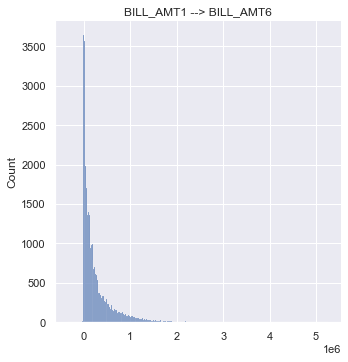

In [20]:
sns.displot(BILL_AMT)
plt.title('BILL_AMT1 --> BILL_AMT6')

<AxesSubplot:ylabel='Density'>

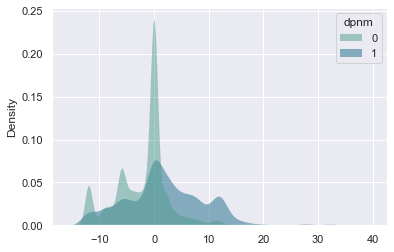

In [21]:
sns.kdeplot(
   data=data, x= PAY , hue="dpnm",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

<AxesSubplot:ylabel='Density'>

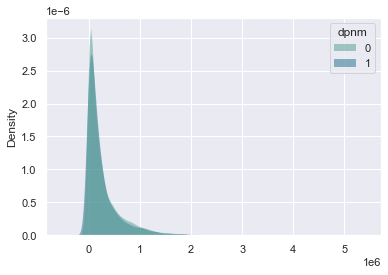

In [22]:
sns.kdeplot(
   data=data, x= BILL_AMT , hue="dpnm",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

# Feature Selection

In [23]:
X = data.drop('dpnm', axis = 1)    
Y = data[['dpnm']]                 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

<ipython-input-25-99e977f73f42>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train, y_train)


Text(0.5, 0, 'Feature Importance')

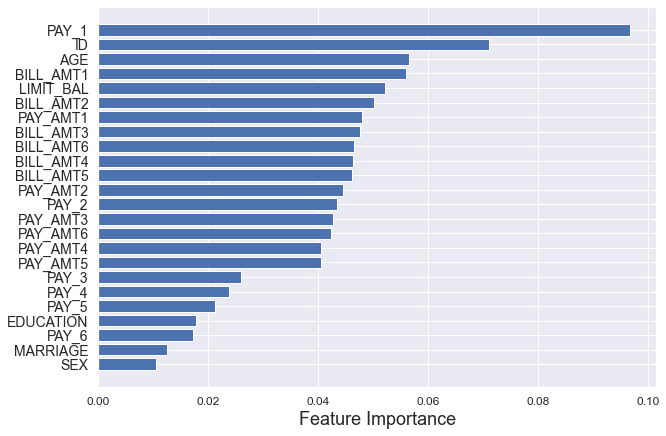

In [25]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(x_train, y_train)

features = list(x_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance', fontsize = 18)

# Decision Tree

In [26]:
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [27]:
DT.score(x_train,y_train)

0.8207916666666667

In [28]:
DT.score(x_test,y_test)

0.8175

# Support Vector Machine (SVM)

In [29]:
SVM = SVC(kernel='linear',C=1.0, gamma='scale')

In [ ]:
SVM.fit(x_train,y_train)

C:\Users\hossam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# K-Nearest Neighbors (KNN)

In [ ]:
kclf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
kclf.fit(x_train,y_train)

In [ ]:
kclf.score(x_test,y_test)